# Projet 7 - Implementation of a scoring model
# Notebook - Model comparison

# Context




# Data sources

The webpage containing all data and descriptions: <a href="https://www.kaggle.com/c/home-credit-default-risk/data" target="_blank">here</a>.

# Glossary

__- TP:__ True positives correspond to customers which are classified as they would default the repayment of their loan and they would as expected.<br>
__- FP:__ False positives correspond to customers which were guessed trustless to repay their loans whereas they would have to (Secondary case to avoid and minimize if possible).<br>
__- FN:__ False negatives correspond to customers which were guessed trustful to repay their loans whereas they will not (Worst case to absolutly minimize).<br>
__- TN:__ True negatives correspond to customers which are classified as they would not default the repayment of their loan and they don't as expected.<br>
__- dt_sp:__ Data sampling.<br>
__- wt:__ Weight.<br>
__- opt:__ Optimal.<br>
__- synth_sp:__ Synthetic sampling.<br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Model-comparison" data-toc-modified-id="Notebook---Model-comparison-2">Notebook - Model comparison</a></span></li><li><span><a href="#Context" data-toc-modified-id="Context-3">Context</a></span></li><li><span><a href="#Data-sources" data-toc-modified-id="Data-sources-4">Data sources</a></span></li><li><span><a href="#Glossary" data-toc-modified-id="Glossary-5">Glossary</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-6">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-6.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Settings-of-global-graphics-parameters" data-toc-modified-id="2)-Settings-of-global-graphics-parameters-6.2">2) Settings of global graphics parameters</a></span></li><li><span><a href="#3)-Global-files'-path" data-toc-modified-id="3)-Global-files'-path-6.3">3) Global files' path</a></span></li><li><span><a href="#4)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="4)-Importation-of-the-preprocessed-datasets-6.4">4) Importation of the preprocessed datasets</a></span></li><li><span><a href="#5)-Separation-of-the-explicatives-and-the-explicated" data-toc-modified-id="5)-Separation-of-the-explicatives-and-the-explicated-6.5">5) Separation of the explicatives and the explicated</a></span></li></ul></li><li><span><a href="#II)-Model" data-toc-modified-id="II)-Model-7">II) Model</a></span><ul class="toc-item"><li><span><a href="#1)-Importation-of-required-libraries" data-toc-modified-id="1)-Importation-of-required-libraries-7.1">1) Importation of required libraries</a></span></li><li><span><a href="#2)-Global-variables" data-toc-modified-id="2)-Global-variables-7.2">2) Global variables</a></span></li><li><span><a href="#3)-Functions" data-toc-modified-id="3)-Functions-7.3">3) Functions</a></span><ul class="toc-item"><li><span><a href="#a)-Hyperparameter-tuning" data-toc-modified-id="a)-Hyperparameter-tuning-7.3.1">a) Hyperparameter tuning</a></span></li><li><span><a href="#b)-Model-performance-evaluation" data-toc-modified-id="b)-Model-performance-evaluation-7.3.2">b) Model performance evaluation</a></span></li><li><span><a href="#c)-Building-model-pipeline" data-toc-modified-id="c)-Building-model-pipeline-7.3.3">c) Building model pipeline</a></span></li><li><span><a href="#d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models" data-toc-modified-id="d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models-7.3.4">d) Simplification of the hyperparameters tuning and the evaluation of the models</a></span></li><li><span><a href="#e)-LightGBM" data-toc-modified-id="e)-LightGBM-7.3.5">e) LightGBM</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-7.3.5.1">i. Importation</a></span></li><li><span><a href="#ii.-Build-the-model-pipeline" data-toc-modified-id="ii.-Build-the-model-pipeline-7.3.5.2">ii. Build the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-7.3.5.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#ii.-Evaluation-of-the-optimized-model-performances" data-toc-modified-id="ii.-Evaluation-of-the-optimized-model-performances-7.3.5.4">ii. Evaluation of the optimized model performances</a></span></li><li><span><a href="#iii.-Generalization-over-the-test-set" data-toc-modified-id="iii.-Generalization-over-the-test-set-7.3.5.5">iii. Generalization over the test set</a></span></li></ul></li><li><span><a href="#f)-Models-comparison" data-toc-modified-id="f)-Models-comparison-7.3.6">f) Models comparison</a></span><ul class="toc-item"><li><span><a href="#i.-Functions" data-toc-modified-id="i.-Functions-7.3.6.1">i. Functions</a></span></li><li><span><a href="#ii.-Figures" data-toc-modified-id="ii.-Figures-7.3.6.2">ii. Figures</a></span></li></ul></li></ul></li></ul></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
### File management ###

# Files' path.
import os.path

# Save and load files.
import csv
import pickle
import joblib


### Data manipulations ###

import numpy as np
from numpy import set_printoptions # Saving full data when exporting to csv format.
import pandas as pd


### Custom functions ###

from shared_functions import *


### Date & time ###

# Time measurment and datetime management
import datetime as dt
from time import time


### Warnings removal ###

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data visualizations ###

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Settings of global graphics parameters

In [2]:
### Set default figure parameters for the whole notebook ###

# Default parameters for matplotlib's figures.
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['figure.dpi'] = 200
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['b', 'r', 'g'])
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Default parameters of seaborn's figures.
sns.set_style('white') # NB: Needs to be above sns.set_theme to properly attend custom_params.
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette='deep', rc=custom_params)

## 3) Global files' path

In [3]:
# Global file paths.
#EXPORTS_DIR_PATH = 'Exports'
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
SELECTED_MODEL_DIR_PATH = r'Exports\Models\Selected' 

CSV_MODELS_FILE = 'models_info.csv'
PKL_MODELS_FILE = 'models_info.pkl'
PKL_MODEL_FILE = 'selected_model.pkl'
JBL_MODEL_FILE = 'selected_model.jbl'
#JSON_MODELS_FILE = 'models_info.json'
#DATASETS_DIR_PATH = r'D:\0Partage\MP-P2PNet\MP-Sync\MP-Sync_Pro\Info\OC_DS\Projet 7\Datasets' #os.path.join('D:', '0Partage', 'MP-P2PNet', 'MP-Sync', 'MP-Sync_Pro', 'Info', 'OC_DS', 'Projet 7', 'Datasets')

## 4) Importation of the preprocessed datasets

In [4]:
df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
df_valid = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_valid.csv'))
df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
#df_new_customers = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_new_customers.csv'))

In [5]:
del_features = ['SK_ID_CURR'] #, 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']

df_train = df_train.drop(del_features, axis=1)
df_valid = df_valid.drop(del_features, axis=1)
df_test = df_test.drop(del_features, axis=1)

In [6]:
%%time

df_train = find_int_cols(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(112), int64(57)
memory usage: 30.9 MB
CPU times: total: 3.69 s
Wall time: 3.69 s


In [7]:
df_train = reduce_memory(df_train)
print()
df_train.info()

Initial df memory usage is 30.94 MB for 169 columns
Final memory usage is: 8.74 MB - decreased by 71.7%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float16(71), float32(41), int16(19), int8(38)
memory usage: 8.7 MB


## 5) Separation of the explicatives and the explicated

In [8]:
X_TRAIN = df_train.drop('TARGET', axis=1)
y_TRAIN = df_train['TARGET']

#X_VALID = df_valid.drop('TARGET', axis=1)
#y_VALID = df_valid['TARGET']

X_TEST = df_test.drop('TARGET', axis=1)
y_TEST = df_test['TARGET']

# II) Model

## 1) Importation of required libraries

In [9]:
# Additional common libraries.
from numpy import argmax, argmin
import math
from random import sample as py_rd_sp # Python random sampling.

# sklearn tools ad libraries.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, fbeta_score, confusion_matrix

# Make a sklearn job scorer.
from sklearn.metrics import make_scorer

# Data sampling.
from imblearn.pipeline import Pipeline # NB: imbalearn.pipeline.Pipeline allows to properly deal the SMOTE on the train set and avoid the validation/test sets.
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC # NB: SMOTENC can manage categorial features while SMOTE cannot.


### Beyesian hyperparmaters tuning ###

# Hyperopt modules.
from hyperopt import STATUS_OK # Check if the objective function returned a valid value (Mandatory).

# Methods for the domain space, algorithm optimization, save the trials history, bayesian optimization.
from hyperopt import hp, tpe, Trials, fmin

*NB: In order to calculate the best probability threshold the AUCROC is selected over the AUCPR since the first one focuses on the FP and FN balance (the 2 most important values to consider for this project) while the AUCPR focused exclusively on the positive (minority class) (=> FP) which does not take into account the most relevant value for this project (FN).*

## 2) Global variables

In [10]:
# True: Allows hyperprameter tuning, False: Get the results stored from the last hyperparameters tuning.
HT = True

# For imbalanced data use weight or data sampling.
IMB_PROCESS = 'Weight' #'Resp'


# Global common scaler to use.
SCALER = MinMaxScaler()
if SCALER != None:
    SCALER_PREFIX_LABEL = 'scl_'

# Initialize the default cross validation method to use.
SKF_5 = StratifiedKFold(5, shuffle=True, random_state=0)


# Set and initialize the main scorer used for the models comparisons.
MAIN_SCORER_TRAIN_LABEL = 'Job_score_train'
MAIN_SCORER_TEST_LABEL = 'Job_score_test'
MAIN_SCORER_VAL = 0


# Load/create and initialize the dataframe in which store all relevant models' information (best hyperparameters, scores...).
# NB: In case of the creation of the file data=np.full((1,len(l_COL_LABELS)), None) to force dtypes as objects
#     until one of the next added entries (rows) are full then, it will be removed. Otherwise, the np.nan values which will appear
#     within the first row will convert their columns' dtypes to float64 and prevent their replacement
#     by objects such as np.array.
l_COL_LABELS = ['Model_labels', 'Models',
                'yhat_train', 'yhat_test',
                'Best_proba_threshold_train', 'Best_proba_threshold_test',
                MAIN_SCORER_TRAIN_LABEL, MAIN_SCORER_TEST_LABEL, 
                'AUROC_scores_train', 'AUROC_scores_test',
                'F-bêta_score_train', 'F-bêta_score_test',
                'Process_time_train (s)', 'Process_time_test (s)',
                'Confusion_matrix_values_train ([TP, FP, FN, TN])', 'Confusion_matrix_values_test ([TP, FP, FN, TN])'
               ]

# Update the csv file containing the training information and scores of the model or not (True = update, False = create a new one).
GET_CSV_FILE = True
if GET_CSV_FILE:
    try:
        df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')

    except:
        print("No csv models informations were found. A new one is created...")
        df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), None), columns=l_COL_LABELS).set_index('Model_labels')
        df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
        print('Done !')
    
else:
    print("Creation of a new csv file to store models informations...")
    df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), None), columns=l_COL_LABELS).set_index('Model_labels')
    df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
    print('Done !')  

display(df_MODELS.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, scl_wt_lgbm_clf_fine_opt to scl_wt_lgbm_clf_fine_opt
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Models                                            1 non-null      object 
 1   yhat_train                                        1 non-null      object 
 2   yhat_test                                         1 non-null      object 
 3   Best_proba_threshold_train                        1 non-null      float64
 4   Best_proba_threshold_test                         1 non-null      object 
 5   Job_score_train                                   1 non-null      float64
 6   Job_score_test                                    1 non-null      object 
 7   AUROC_scores_train                                1 non-null      float64
 8   AUROC_scores_test                                 1 non-null   

None

In [11]:
df_MODELS

,Models,yhat_train,yhat_test,Best_proba_threshold_train,Best_proba_threshold_test,Job_score_train,Job_score_test,AUROC_scores_train,AUROC_scores_test,F-bêta_score_train,F-bêta_score_test,Process_time_train (s),Process_time_test (s),"Confusion_matrix_values_train ([TP, FP, FN, TN])","Confusion_matrix_values_test ([TP, FP, FN, TN])"
Model_labels,,,,,,,,,,,,,,,
scl_wt_lgbm_clf_fine_opt,"(MinMaxScaler(), LGBMClassifier(class_weight='...","[0.42239522502009363, 0.7094195575050377, 0.13...","[0.42239522502009363, 0.7094195575050377, 0.13...",0.46,0.46,0.67787,0.67787,0.731314,0.731314,0.898231,0.898231,1.409281,1.436306,"[1214, 6223, 708, 15854]","[1214, 6223, 708, 15854]"


## 3) Functions 

### a) Hyperparameter tuning

In [12]:
def hyper_tune_bayes (model,
                      search_space,
                      model_label,
                      cv,
                      action = 0,
                      max_eval = 5,
                      eval_metric = gain_norm, # Mesure d'évaluation
                      eval_metric_label = 'g_norm',
                      X = X_TRAIN,
                      y = y_TRAIN,
                      n_iter = 1
                     ):

    
    ### Configuration ###

    # Set global variabls.
    global ITERATION
    
    # Set save file path.
    history_dir_path = os.path.join(r'Exports\Models\Selected\Hyperparams_tuning_history')
    csv_file_name = model_label + "_" + eval_metric_label + "_trials.csv"
    p_file_name = model_label + "_" + eval_metric_label + "_trials.pkl"
    
    
    #history_json_file_path = os.path.join(r'Exports\Models\Hyperparams_tuning_history',
    #                                 model_label + "_" + eval_metric_label + '_trials.json')
    
    
    # 1. Definition of the objective function (=> calculation of the loss score).
    def objective (hyperparams_set):
        
        print(hyperparams_set)
        
        # Count each function call as an iteration.
        global ITERATION    
        ITERATION += 1

        # On s'assure que les paramètres soient au bon format
        #for param_label in ['num_leaves','max_depth','n_estimators']:
        #    params[param_label] = int(params[param_label])

        ### Initializes a new set of model's hyperparameters values.
        #model_hyperparams = {'n_estimators': int(params['n_estimators']), 
        #                     'class_weight': params['class_weight'],
        #                     'max_depth': int(params['max_depth']), 
        #                     'learning_rate': params['learning_rate'],
        #                     'subsample': params['subsample'],
        #                     'colsample_bytree': params['colsample_bytree'],
        #                     'num_leaves': int(params['num_leaves']),
        #                     'reg_alpha': params['reg_alpha'],
        #                     'reg_lambda': params['reg_lambda']
        #                    }
        
        
        
        ### Methode 1: The best threshold is determined by the algorithm as any other hyperparmeters ###
        # NB: 25 % faster than method 2.
        
        # Get the classification probability threshold to try (chosen the algorithm).
        #proba_thr = hyperparams_set['proba_thr']
        
        # Delete the custom probability "hyperparmeter" as it does not belong to the model hyperparameters.
        #del hyperparams_set['proba_thr']
        
        # Set the new model's hyperparameters values to try.
        #model.set_params(**hyperparams_set)

        # Get the time before the model training and predictions processes.
        #t0 = time()
        
        # Get the positive probabilities over all validation folds.
        #y_proba_P_cv = cross_val_predict(model, X, y, method='predict_proba', cv=cv)[:, 1]

        # If positive probability > probility threshold => prediction = 1
        # NB: "(y_proba_P_cv > proba_thr)" returns a boolean np.array() and "* 1" converts booleans as True = 1 or False = 0.
        #y_pred = (y_proba_P_cv > proba_thr) * 1
            
        # Get the score value of the chosen metric.
        #score = eval_metric(y, y_pred)
        
        
        ### Methode 2: The best threshold is determined at each iteration by
        #              calculating all thresholds before selecting the best one. 
        #              Everything is done within the score calculation function ###
        # NB: 25 % slower than method 1.
        
        # Set the new model's hyperparameters values to try.
        model.set_params(**hyperparams_set)

        # Get the time before the model training and predictions processes.
        t0 = time()
        
        # Get the positive probabilities over all validation folds.
        y_proba_P_cv = cross_val_predict(model, X, y, method='predict_proba', cv=cv)[:, 1]

        # Get the score value of the chosen metric.
        score, proba_thr = eval_metric(y, y_proba_P_cv)
    
        
        ### Calculate the loss function ###
    
        # Calculate the corresponding loss (value to minimize).
        loss = 1 - score

        # Calculate the processing time.
        run_time = round((time() - t0), 2)
               
        # Save the trials results into a readable csv.
        with open(os.path.join(history_dir_path, csv_file_name), 'a') as history_file:
            csv_file_writer = csv.writer(history_file)
            csv_file_writer.writerow([ITERATION, loss, proba_thr, run_time, hyperparams_set])
            history_file.close()
            
        #with open(os.path.join(history_dir_path, p_file_name), 'a') as history_file:
            #json_file_writer = json.writer(history_file)
            #history_file.write(json.dumps({'loss': loss, 'status': STATUS_OK}))
            #history_file.close()
        
        return {'loss': loss, 'status': STATUS_OK} #, 'hyperparams': hyperparams_set, 'proba_thr': proba_thr, 'iter': ITERATION, 'run_time': run_time,}

    
    def process ():
        
        best_hyperparams = fmin(fn = objective,
                                space = search_space,
                                algo = tpe.suggest,
                                max_evals = max_eval,
                                trials = trials,
                #               rstate = np.random.RandomState(rs_)
                               )       
        
        # Save the trials' history to continue the hyperparameter tuning if required later on.
        #history_file = pd.read_csv(os.path.join(history_dir_path, csv_file_name))
        #json.dump(trials, open(os.path.join(history_dir_path, p_file_name)), indent=4)
        pickle.dump(trials, open(os.path.join(history_dir_path, p_file_name), "wb"))   
       
    
    # 2. Dictionary of hyperparameters (Domain space).
    


    
    # 3. Optimization algorithm (Substitution function).
    tpe_algorithm = tpe.suggest
    
    
    # 4. Process and save trials.
            
    if action == 0:
               
        # To save trials.
        trials = Trials()

        # Create and open the file into which save the history of the hyperparameter tuning.
        with open(os.path.join(history_dir_path, csv_file_name), 'w') as history_file:

            csv_file_writer = csv.writer(history_file)

            # Create the header of the file then close it.
            csv_file_writer.writerow(['iter', 'loss', 'proba_thr', 'run_time', 'tuned_hyperparams'])
            history_file.close()

        # Create and open the file into which save the history of the hyperparameter tuning.
        with open(os.path.join(history_dir_path, p_file_name), 'w') as history_file:
            history_file.close()


        #global ITERATION
        ITERATION = 0

        process()
        
        
        ### Adjustements in case of n_iter > 1 ###
        
        # Remove one iteration if the file is created instead of loaded.
        n_iter -= 1
        
        # Tell the algorithm to write in the created files the nexts results instead of overwritting it.
        action = 1

        
    if action == 1 and n_iter > 0:
    
        add_n_eval = max_eval
    
        # Process the hyperparamters tuning as many time as set.
        for i in range(n_iter):
                
            # Save the trial results
            #with open('trials.json', 'w') as f:
               # f.write(json.dumps(trials_dict))

            trials = pickle.load(open(os.path.join(history_dir_path, p_file_name), "rb"))
            #trials = json.load(open(os.path.join(history_dir_path, p_file_name)))
            df_history = pd.read_csv(os.path.join(history_dir_path, csv_file_name))

            #trials = pickle.load(open("my_model.hyperopt", "rb"))x
            print("Trials' history loading...")
            max_eval = len(trials.trials) + add_n_eval
            print("Running from the {}th trial to {} trials (=> +{} trials)".format(len(trials.trials), max_eval, add_n_eval))
            
            print()
            
            ITERATION = len(df_history)

            process()

    df_history = pd.read_csv(os.path.join(history_dir_path, csv_file_name)).sort_values(by='loss')

    return df_history

### b) Model performance evaluation

In [13]:
def evaluate (y_pred_proba_P, y_true = y_TEST, fig = (1,1,1,1), l_model_labels = ['Model']):
      
    global MAIN_SCORER_VAL
    
    ### Calculate necessary variables.
    
    # List of the probability thresholds to try.
    l_proba_thrs = np.linspace(0, 1, num=201)
    
    # Get the predictions corresponding to each probability thresholds tried.
    l_y_pred = get_y_pred_list(y_pred_proba_P, l_proba_thrs)
    
    # Get the corresponding TP, FP, FN and TN for each probability thresholds tried.
    np_tp, np_fp, np_fn, np_tn = np.array(get_tp_fp_fn_tn_lists(y_true, l_y_pred))
    
    # FN cost coefficient (FN ~ 10 FP).
    fn_cost_coeff = 10
    
    # Display figures configuration.
    n_fig = fig.count(1)
    
    if n_fig != 0:
        plt.figure(figsize=(12,12), dpi=300)
        p = 0
        if n_fig == 1:
            l = 1; c = 1
        elif n_fig == 2:
            l = 1; c = 2
        elif n_fig >= 3:
            l = 2; c = 2  
    
    
    ### Calculate the optimal probability threshold.
    
    # Calculate the optimal threshold.
    model_best_thr, best_thr_idx = opt_proba_thr(np_tp, np_fp, np_fn, np_tn, l_proba_thrs)    
    
    # Plot figures.
    if fig[0]:
        p += 1 
        plt.subplot(l,c,p)
        figure_density(y_true, y_pred_proba_P, model_best_thr)
    
    if fig[1]:
        p += 1 
        plt.subplot(l,c,p)
        figure_sum_fp_coeff_fn(np_fp, np_fn, l_proba_thrs, model_best_thr, fn_cost_coeff)
    
    
    ### Calculate scores.
    
    # ROC AUC score.
    roc_auc_s = roc_auc_score(y_true, y_pred_proba_P)
    print('\nROC-AUC = %f' % roc_auc_s) #%.3f
    
    # Plot figure.
    if fig[2]:
        p += 1 
        plt.subplot(l,c,p)
        figure_roc(y_true, [y_pred_proba_P], l_model_labels)
    
    
    # F-bêta score.
    # NB: Square beta = cost FN / cost FP = 10
    square_beta = 100
    beta = round(math.sqrt(square_beta), 2)
      
    # Calculate the F-bêta score for each probability thresholds tried.
    l_fbeta = []
    for y_pred in l_y_pred:
        fbeta = fbeta_score(y_true, y_pred, beta=beta)
        l_fbeta.append(fbeta)
    fbeta = get_fbeta_score(l_proba_thrs, l_fbeta, beta, model_best_thr, best_thr_idx)

    # Plot figure.
    if fig[3]:
        p += 1 
        plt.subplot(l,c,p)
        figure_fbeta_score(l_proba_thrs, l_fbeta, model_best_thr)
    
    
    # Job score.
    g_norm = gain_norm(y_true, l_y_pred[best_thr_idx])
    MAIN_SCORER_VAL = g_norm
    print("Job score: %.3f" % g_norm)
  
    
    print("\n" + "-" * 100 + "\n")
    # Draw figures.
    if fig != (0,0,0,0):
        plt.show()
        
        
    # Confusion matrix.
    print("Confusion matrix:")
    figure_confusion_matrix(y_true, l_y_pred[best_thr_idx])
        
    return model_best_thr, g_norm, roc_auc_s, fbeta, [np_tp[best_thr_idx], np_fp[best_thr_idx], np_fn[best_thr_idx], np_tn[best_thr_idx]]

### c) Building model pipeline

In [14]:
def select_model_label (imb_process, label_root, scaler_prefix_label = SCALER_PREFIX_LABEL):

    if imb_process == 'Resp':
        model_label = scaler_prefix_label + 'resp_' + label_root
    elif imb_process == 'Weight':
        model_label = scaler_prefix_label + 'wt_' + label_root
    else:
        model_label = label_root
    
    return model_label

In [15]:
def set_model_pipeline (model, scaler, imb_process):
    
    # Initiliaze the model or the pipeline with its default values.
    # NB: scaler = MinMaxScaler() as binary categories won't be changed and
    #     the distance between all other values of a feature will be kept.
    pipe_vars = []
    if scaler != None:
        pipe_vars.append(('scaler', scaler))
            
    if imb_process == 'Resp':
        pipe_vars.append(['resampler', SMOTE(random_state=0)])
        pipe_vars.append(['model', model])
    else:
        pipe_vars.append(['model', model])
                            
    model_pl = Pipeline(pipe_vars)
        
    return model_pl

### d) Simplification of the hyperparameters tuning and the evaluation of the models

In [16]:
def block_evaluate (model_pl, df, model_label, X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                    eval_dataset = 'valid_set', get_csv_file = GET_CSV_FILE):

    # Train the model and get its predictions probabilities.
    y_pred_proba_NP, process_time = model_fit_predict(model_pl, X_TRAIN, y_TRAIN, SKF_5)

    # Evaluate the model.
    best_thr, g_norm, rocauc, fbeta, cm_vals = evaluate(y_pred_proba_NP[:,1], y_true=y_TRAIN)
    
    # Store the relevant values in the model storage dataframe.
    l_vars = [model_label, model_pl, y_pred_proba_NP[:,1], best_thr, g_norm, rocauc, fbeta, process_time, cm_vals]

    # Update the csv file if the main score is higher and the user allowed it.
    print("\n" + "-" * 100 + "\n")
    df = update_sum_table(df, l_vars, get_csv_file, eval_dataset, MAIN_SCORER_VAL, l_COL_LABELS)

    return df

### e) LightGBM

#### i. Importation

In [17]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

print('lightgbm version:', lgbm.__version__)

lightgbm version: 3.3.5


In [18]:
# Allow to make a check of the hyperopt sampling.
import hyperopt.pyll.stochastic

# Allow to easily convert a dictionary in a string to a dictionary object.
import ast

#### ii. Build the model pipeline

In [19]:
# Initiliaze the model with its default values.
model = LGBMClassifier(objective='binary', class_weight='balanced', random_state=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'lgbm_clf_fine_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', objective='binary',
                                random_state=0)]])

#### iii. Hyperparameters tuning

In [20]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LGBMClassifier(class_weight='balanced', objective='binary', random_state=0),
 'model__boosting_type': 'gbdt',
 'model__class_weight': 'balanced',
 'model__colsample_bytree': 1.0,
 'model__importance_type': 'split',
 'model__learning_rate': 0.1,
 'model__max_depth': -1,
 'model__min_child_samples': 20,
 'model__min_child_weight': 0.001,
 'model__min_split_gain': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': -1,
 'model__num_leaves': 31,
 'model__objective': 'binary',
 'model__random_state': 0,
 'model__reg_alpha': 0.0,
 'model__reg_lambda': 0.0,
 'model__silent': 'warn',
 'model__subsample': 1.0,
 'model__subsample_for_bin': 200000,
 'model__subsample_freq': 0,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()),
           ['model',
            LGBMClassifier(class_weight='balanced', objective='binary', random_state=0)]],
 'verbose': False}


*NB: q act as the step of the range (ex: uniform vs quniform which allows to select the step between the 2 range limits)*

In [21]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
learning_rate = hp.choice('learning_rate', [round(x, 2) for x in np.linspace(start=0.01, stop=0.3, num=16)]) #hp.uniform('learning_rate', 0.01, 0.3)
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = hp.choice('n_estimators', [int(x) for x in np.linspace(2, 50, 25)])


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = hp.choice('max_depth', [int(x) for x in np.linspace(1, 100, 11)])

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = hp.choice('min_child_weight', [int(x) for x in np.linspace(1, 10, 10)]) #hp.uniform('min_child_weight', 1, 10)

# Specify the minimum loss reduction required to make a split.
#gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = hp.choice('subsample', [x for x in np.linspace(0.5, 1.0, 6)]) #hp.uniform('subsample', 0.5, 1.0)

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = hp.choice('colsample_bytree', [x for x in np.linspace(0.5, 1.0, 6)]) # hp.uniform('colsample_bytree', 0.5, 1.0)


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
reg_lambda = hp.choice('reg_lambda', [x for x in np.logspace(-4, 0, 5)]) #hp.loguniform('reg_lambda', -4, 0) # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
reg_alpha = hp.choice('reg_alpha', [x for x in np.logspace(-4, 0, 5)]) #hp.loguniform('reg_alpha', -4, 0) #default 0.1 


# 4. Custom hyperparameters.

# Set the range of thresholds to try.
#proba_thr = hp.choice('proba_thr', [round(x, 2) for x in np.linspace(0, 1, 101)]) #hp.uniform('proba_thr', 0.0, 1.0) #default 0.1


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_space = {'model__learning_rate': learning_rate,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    #'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree,
                    'model__reg_lambda': reg_lambda,
                    'model__reg_alpha': reg_alpha,
                    #'proba_thr': proba_thr
                   }


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_space, compact=True)

print()

print("Example of an hyperparameters set that the hyperparameter algorithm can choose:")
print(hyperopt.pyll.stochastic.sample(hyperparams_space))

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000001B5F69A7B20>,
 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001B5F6AB8820>,
 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001B5F6A5F730>,
 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000001B5F6A5FF10>,
 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000001B5F6AB8C10>,
 'model__reg_alpha': <hyperopt.pyll.base.Apply object at 0x000001B5F6A92D60>,
 'model__reg_lambda': <hyperopt.pyll.base.Apply object at 0x000001B5F69A7F70>,
 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000001B5F6A5F790>}

Example of an hyperparameters set that the hyperparameter algorithm can choose:
{'model__colsample_bytree': 0.7, 'model__learning_rate': 0.18, 'model__max_depth': 30, 'model__min_child_weight': 8, 'model__n_estimators': 24, 'model__reg_alpha': 1.0, 'model__reg_lambda': 0.001, 'model__subsample': 0.5}

Default values of the 

In [22]:
%%time

search_space = hyperparams_space.copy()
#model_label = 'lgbm_pl'
cv = SKF_5

# True: Tune hyperparameters, False: Get the last tuned results stored.
tune = HT

# Tune the hyperparameters of the model.
if tune:
    hyperparams_tune_history = hyper_tune_bayes(model_pl,
                                                search_space,
                                                model_label,
                                                cv,
                                                action = 0,
                                                max_eval = 5,
                                                eval_metric = scorer_w_thr_fct, #gain_norm, # Mesure d'évaluation
                                                eval_metric_label = 'g_norm',
                                                X = X_TRAIN,
                                                y = y_TRAIN,
                                                n_iter = 2
                                               )

    # Get the model set with the best hyperparameters found.
    hyperparams_tune_history = ast.literal_eval(hyperparams_tune_history.sort_values(by='loss').iloc[0]['tuned_hyperparams'])

    # Set the new model's hyperparameters values to try.
    model_pl_opt = model_pl.set_params(**hyperparams_tune_history)
    
    # Fit the optimized model's pipeline.
    model_pl_opt.fit(X_TRAIN, y_TRAIN)

    # Serialize the tuned model.
    pickle.dump(model_pl_opt, open(os.path.join(SELECTED_MODEL_DIR_PATH, PKL_MODEL_FILE), "wb"))
    joblib.dump(model_pl_opt, open(os.path.join(SELECTED_MODEL_DIR_PATH, JBL_MODEL_FILE), "wb")) 
    
# Load the model.
else:
    # Load the dataframe of all compared models.
    df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
    
    # Load the serialized model.
    #model_pl_opt = df_MODELS.loc[model_label, 'Models']
    model_pl_opt = pickle.load(open(os.path.join(SELECTED_MODEL_DIR_PATH, PKL_MODEL_FILE), "rb"))
    
print()

# Show the pipeline after optimization.
display(model_pl_opt)

print()

{'model__colsample_bytree': 0.5, 'model__learning_rate': 0.16, 'model__max_depth': 60, 'model__min_child_weight': 2, 'model__n_estimators': 18, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1.0, 'model__subsample': 0.8}
Best probability threshold:                                                                                            
0.44                                                                                                                   
{'model__colsample_bytree': 0.7, 'model__learning_rate': 0.28, 'model__max_depth': 40, 'model__min_child_weight': 2, 'model__n_estimators': 28, 'model__reg_alpha': 0.001, 'model__reg_lambda': 0.01, 'model__subsample': 0.6}
Best probability threshold:                                                                                            
0.35                                                                                                                   
{'model__colsample_bytree': 0.5, 'model__learning_rate': 0.07, 'model__max_de

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
                                learning_rate=0.07, max_depth=90,
                                min_child_weight=10, n_estimators=50,
                                objective='binary', random_state=0,
                                reg_alpha=0.01, reg_lambda=0.1,
                                subsample=0.7)]])


CPU times: total: 3min 53s
Wall time: 24.1 s


#### ii. Evaluation of the optimized model performances


ROC-AUC = 0.737041
F-Bêta score of the optimal threshold found = 0.603
Highest F-Bêta score = 0.898
Job score: 0.682

----------------------------------------------------------------------------------------------------



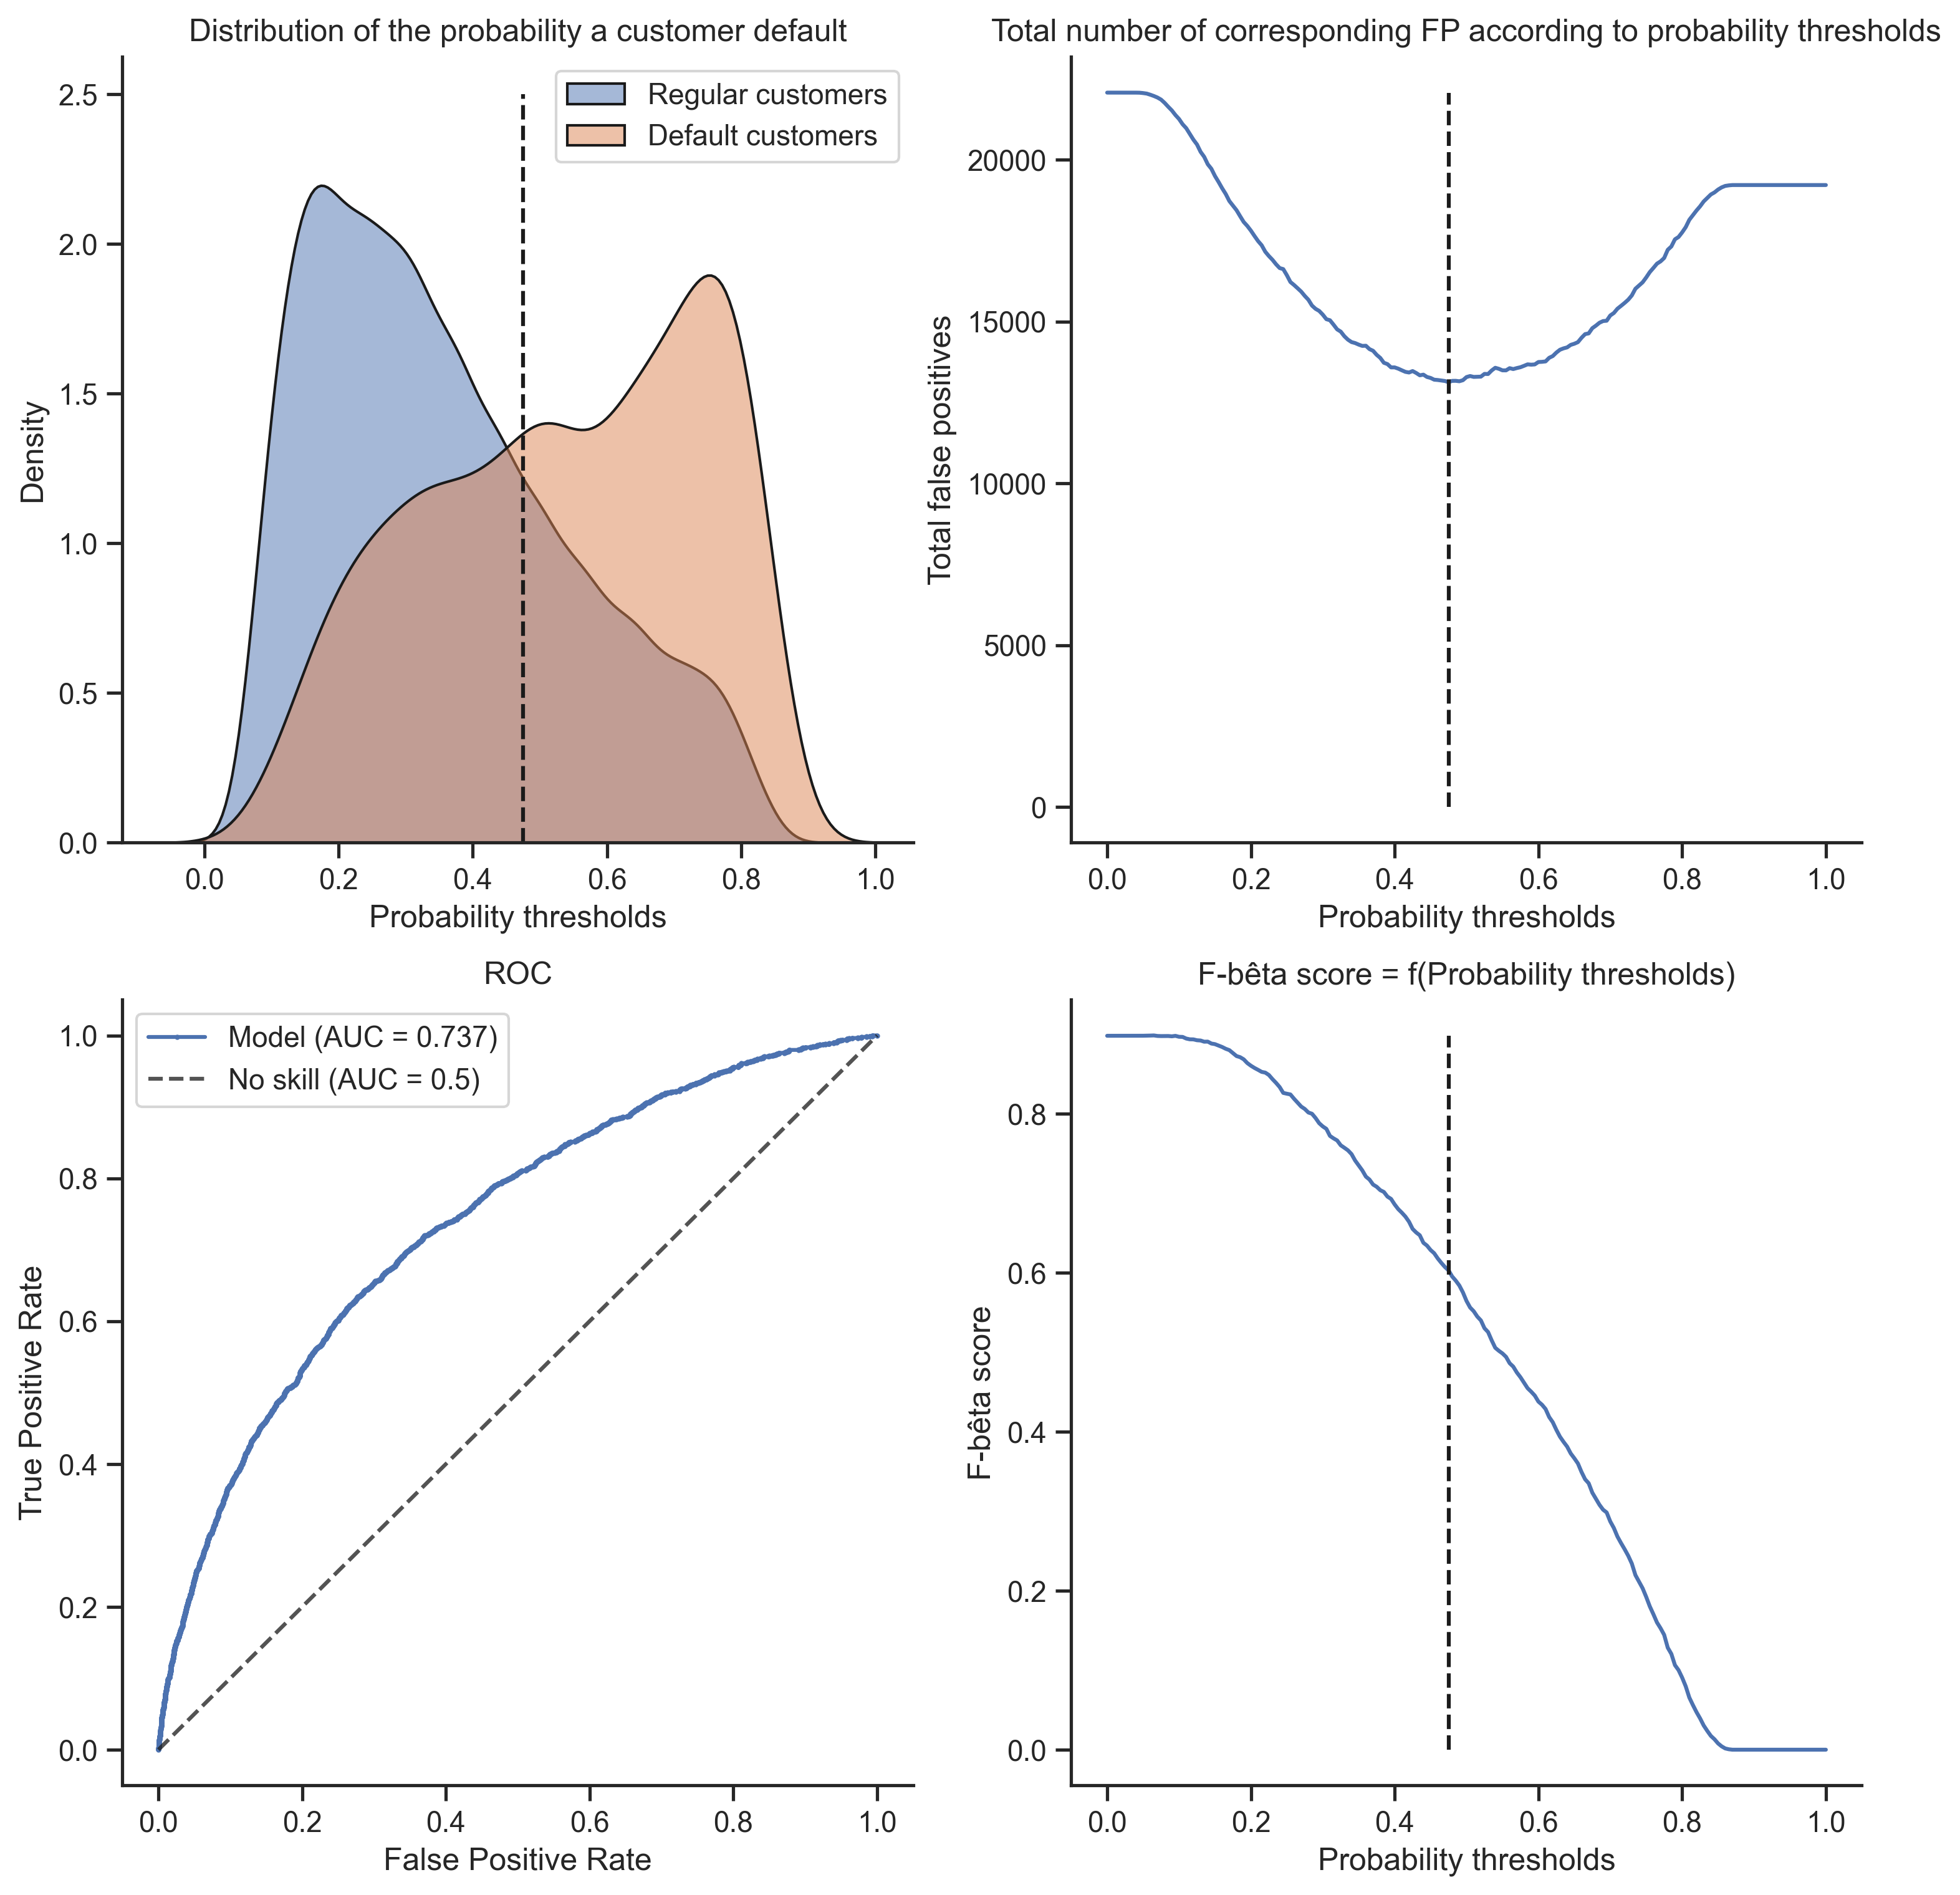

Confusion matrix:


,Negatives,Positives
Negatives,TN: 16280,FN: 733
Positives,FP: 5797,TP: 1189



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


,Models,yhat_train,yhat_test,Best_proba_threshold_train,Best_proba_threshold_test,Job_score_train,Job_score_test,AUROC_scores_train,AUROC_scores_test,F-bêta_score_train,F-bêta_score_test,Process_time_train (s),Process_time_test (s),"Confusion_matrix_values_train ([TP, FP, FN, TN])","Confusion_matrix_values_test ([TP, FP, FN, TN])"
Model_labels,,,,,,,,,,,,,,,
scl_wt_lgbm_clf_fine_opt,"(MinMaxScaler(), LGBMClassifier(class_weight='...","[0.523704688608722, 0.6503234022789888, 0.2041...","[0.42239522502009363, 0.7094195575050377, 0.13...",0.475,0.46,0.682132,0.67787,0.737041,0.731314,0.898322,0.898231,1.963784,1.436306,"[1189, 5797, 733, 16280]","[1214, 6223, 708, 15854]"


CPU times: total: 38.3 s
Wall time: 8.06 s


In [23]:
%%time

# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### iii. Generalization over the test set


ROC-AUC = 0.737041
F-Bêta score of the optimal threshold found = 0.603
Highest F-Bêta score = 0.898
Job score: 0.682

----------------------------------------------------------------------------------------------------



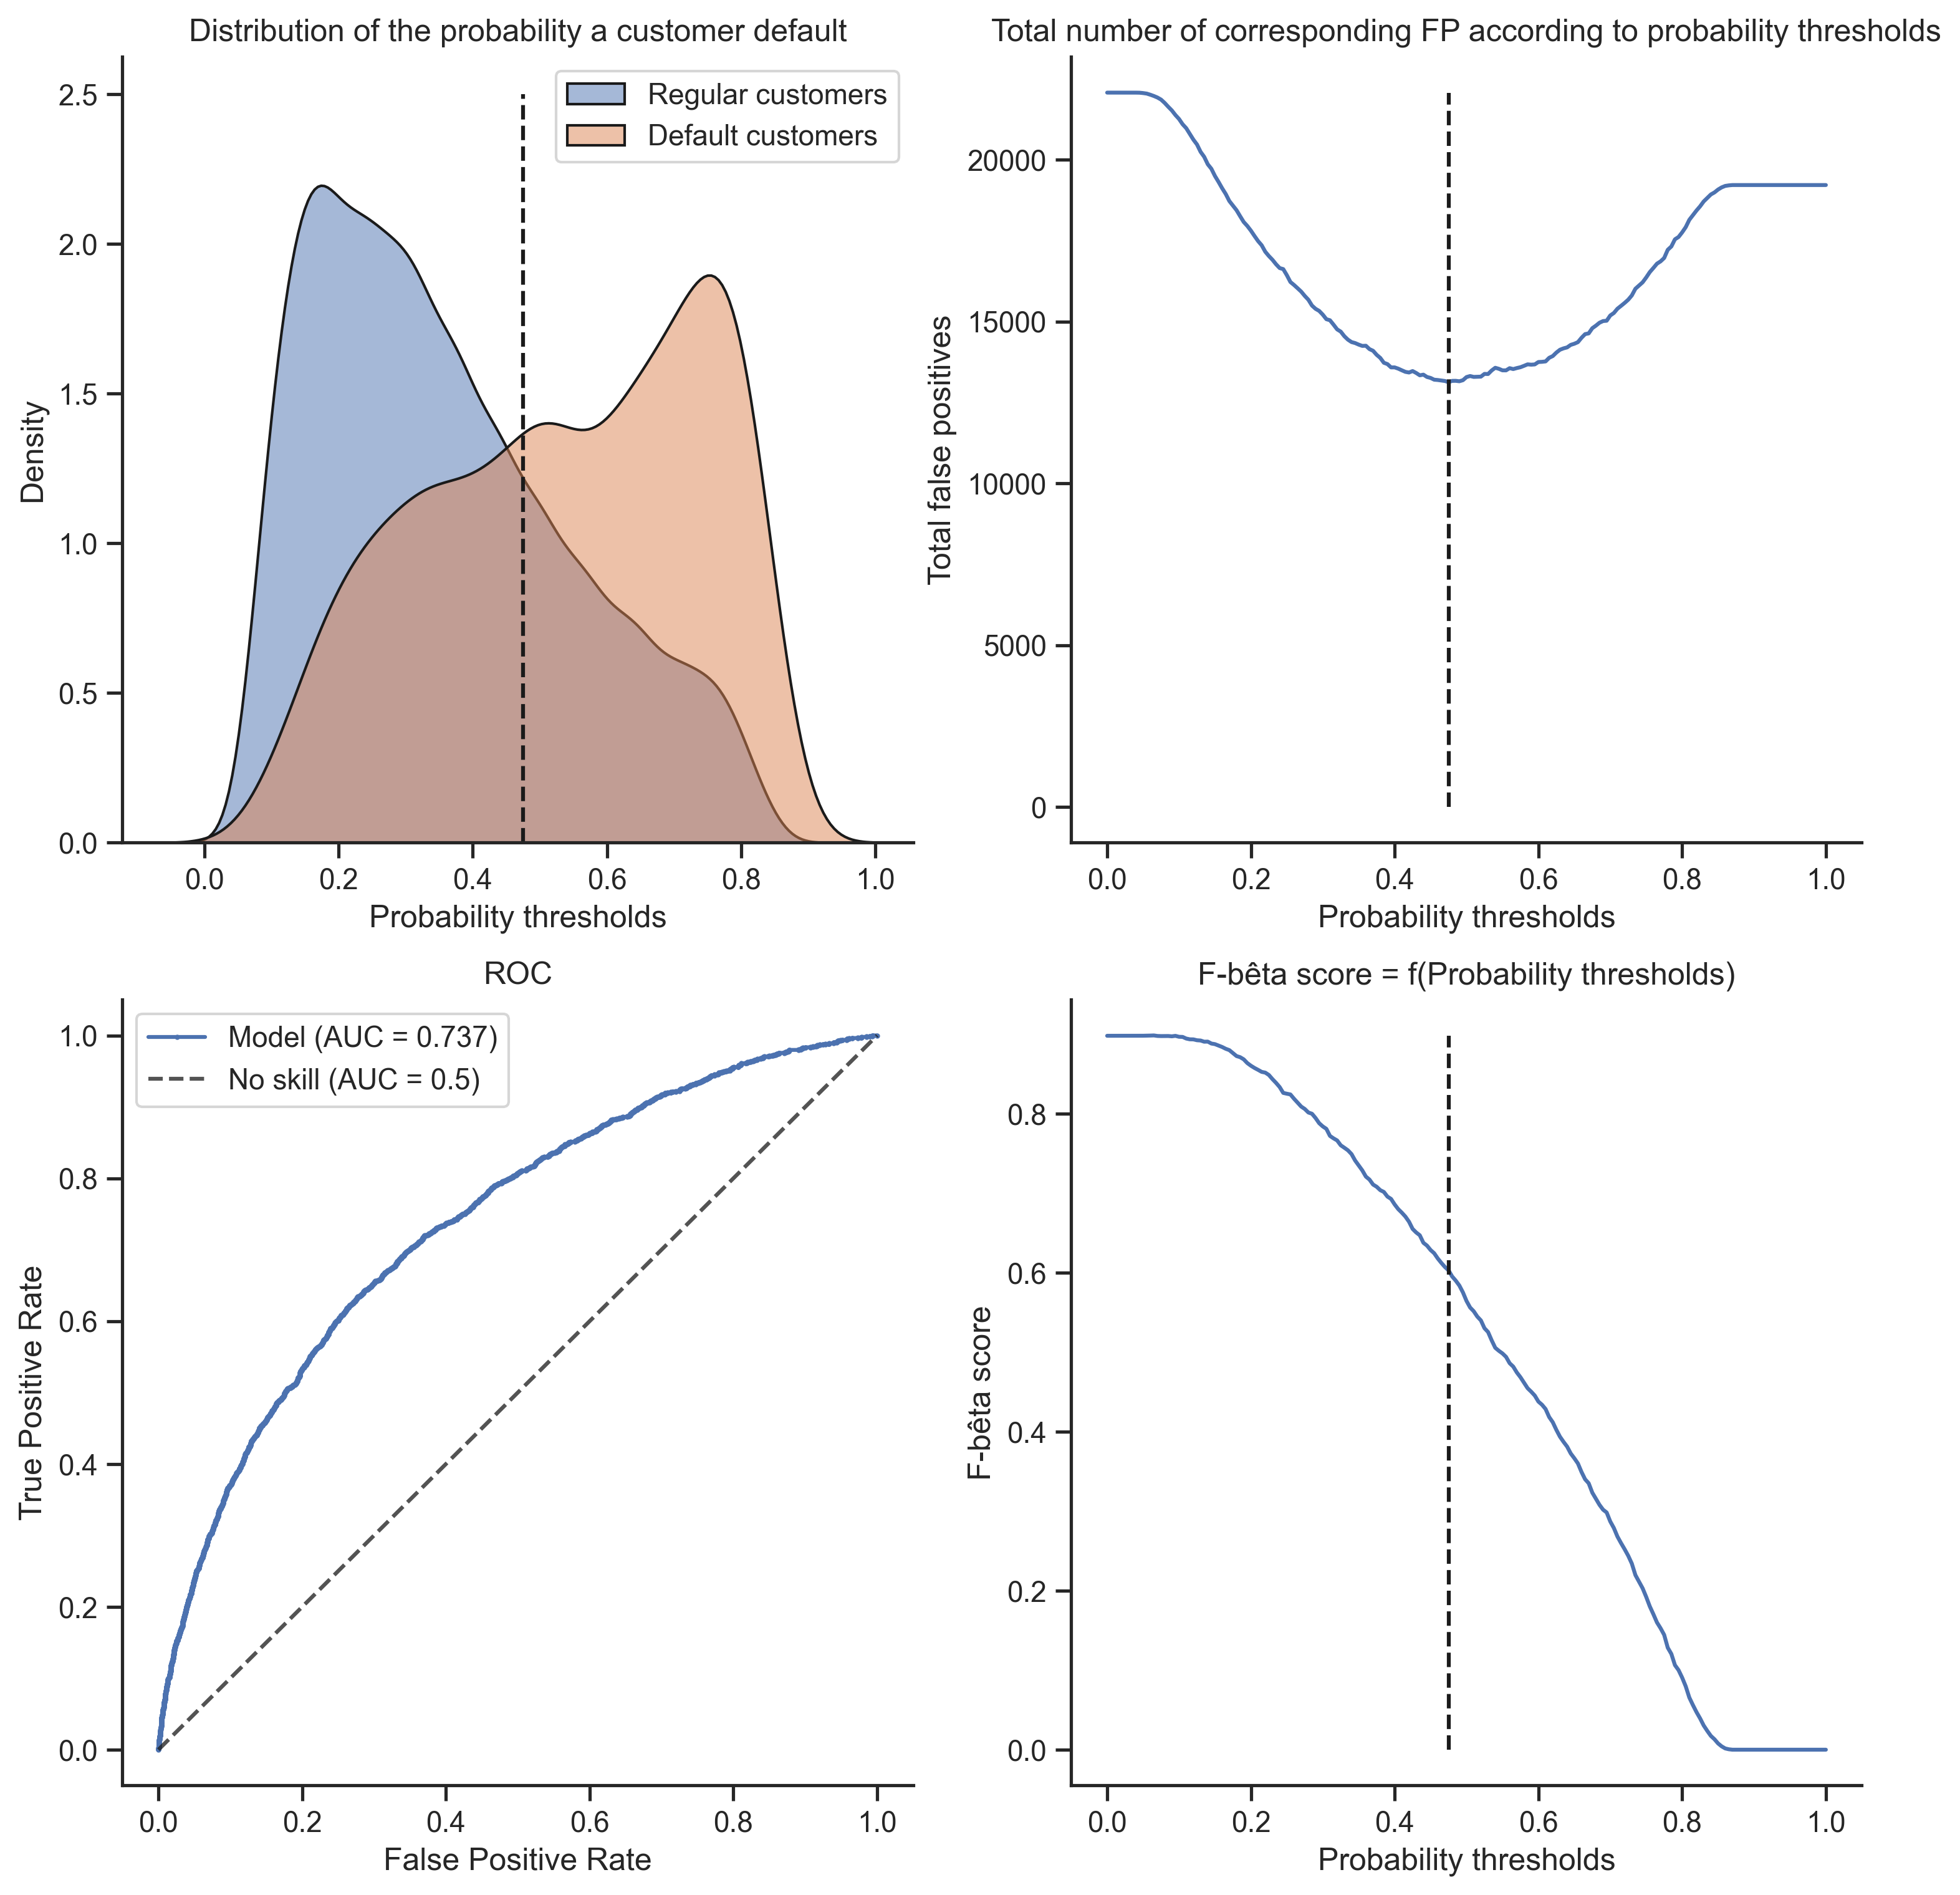

Confusion matrix:


,Negatives,Positives
Negatives,TN: 16280,FN: 733
Positives,FP: 5797,TP: 1189



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


,Models,yhat_train,yhat_test,Best_proba_threshold_train,Best_proba_threshold_test,Job_score_train,Job_score_test,AUROC_scores_train,AUROC_scores_test,F-bêta_score_train,F-bêta_score_test,Process_time_train (s),Process_time_test (s),"Confusion_matrix_values_train ([TP, FP, FN, TN])","Confusion_matrix_values_test ([TP, FP, FN, TN])"
Model_labels,,,,,,,,,,,,,,,
scl_wt_lgbm_clf_fine_opt,"(MinMaxScaler(), LGBMClassifier(class_weight='...","[0.523704688608722, 0.6503234022789888, 0.2041...","[0.523704688608722, 0.6503234022789888, 0.2041...",0.475,0.475,0.682132,0.682132,0.737041,0.737041,0.898322,0.898322,1.963784,1.964785,"[1189, 5797, 733, 16280]","[1189, 5797, 733, 16280]"


CPU times: total: 38.6 s
Wall time: 7.76 s


In [24]:
%%time

# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### f) Models comparison

#### i. Functions

In [25]:
def figure_barplot (df, x_labels = 'Model_labels', y_label = 'Score', title = None):
    
    # Rearrange the df such as it fits the seaborn.barplot() data format.
    tidy = df.reset_index().melt(id_vars=x_labels, value_name=y_label, var_name='')
    
    # Plot the figure.
    ax = sns.barplot(data=tidy, y=x_labels, x=y_label, hue='', orient='h', edgecolor='k')
    
    plt.ylabel = ' '
    
    # Set the figure title.
    plt.title(title)
    
    #return ax

#### ii. Figures

*__- ROCs comparison__*

CPU times: total: 391 ms
Wall time: 30 ms


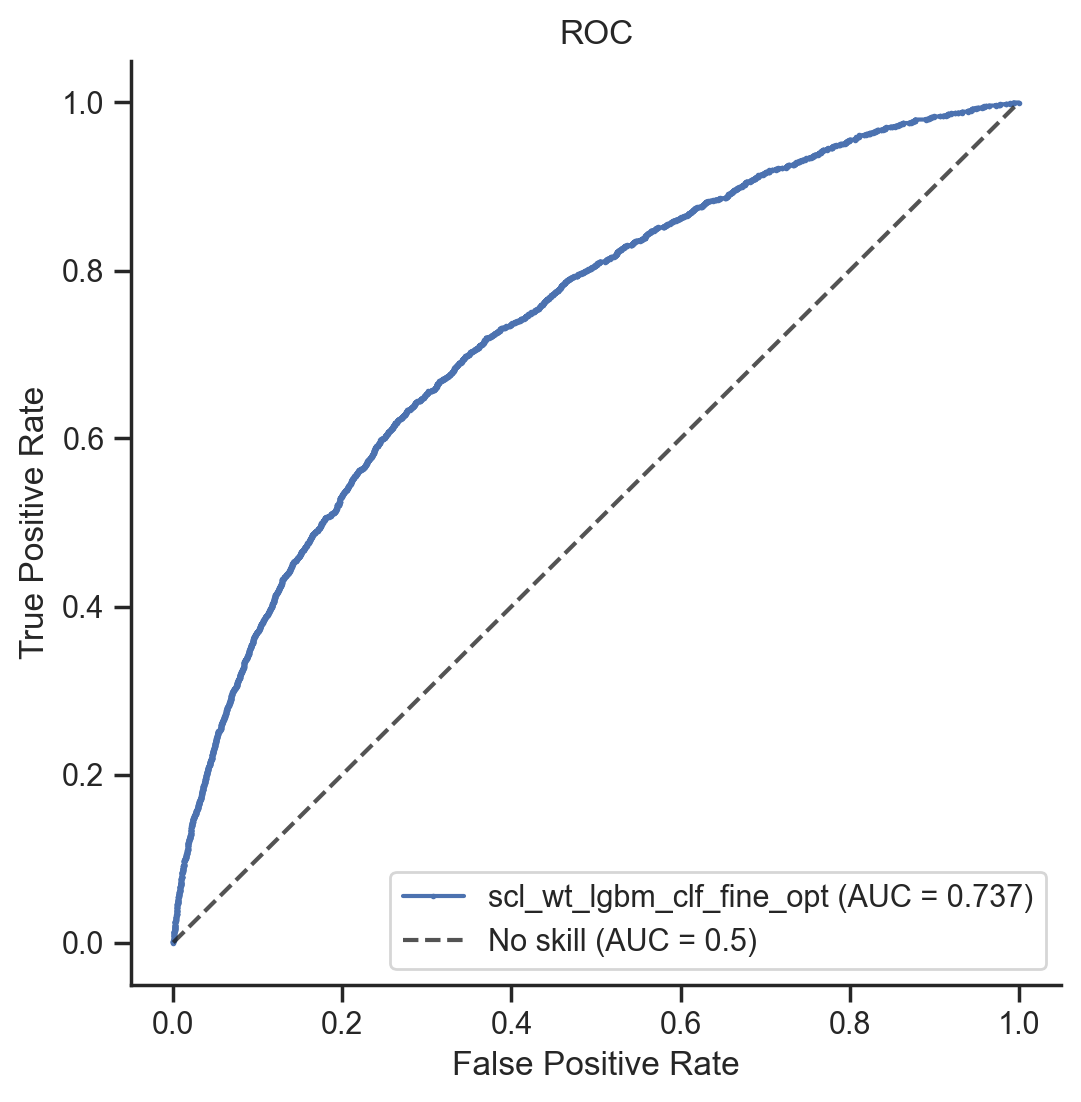

In [26]:
%%time

# Draw the ROCs.
figure_roc(y_TRAIN, df_MODELS['yhat_train'], df_MODELS.index)

*__- Scores and processing times comparisons__*

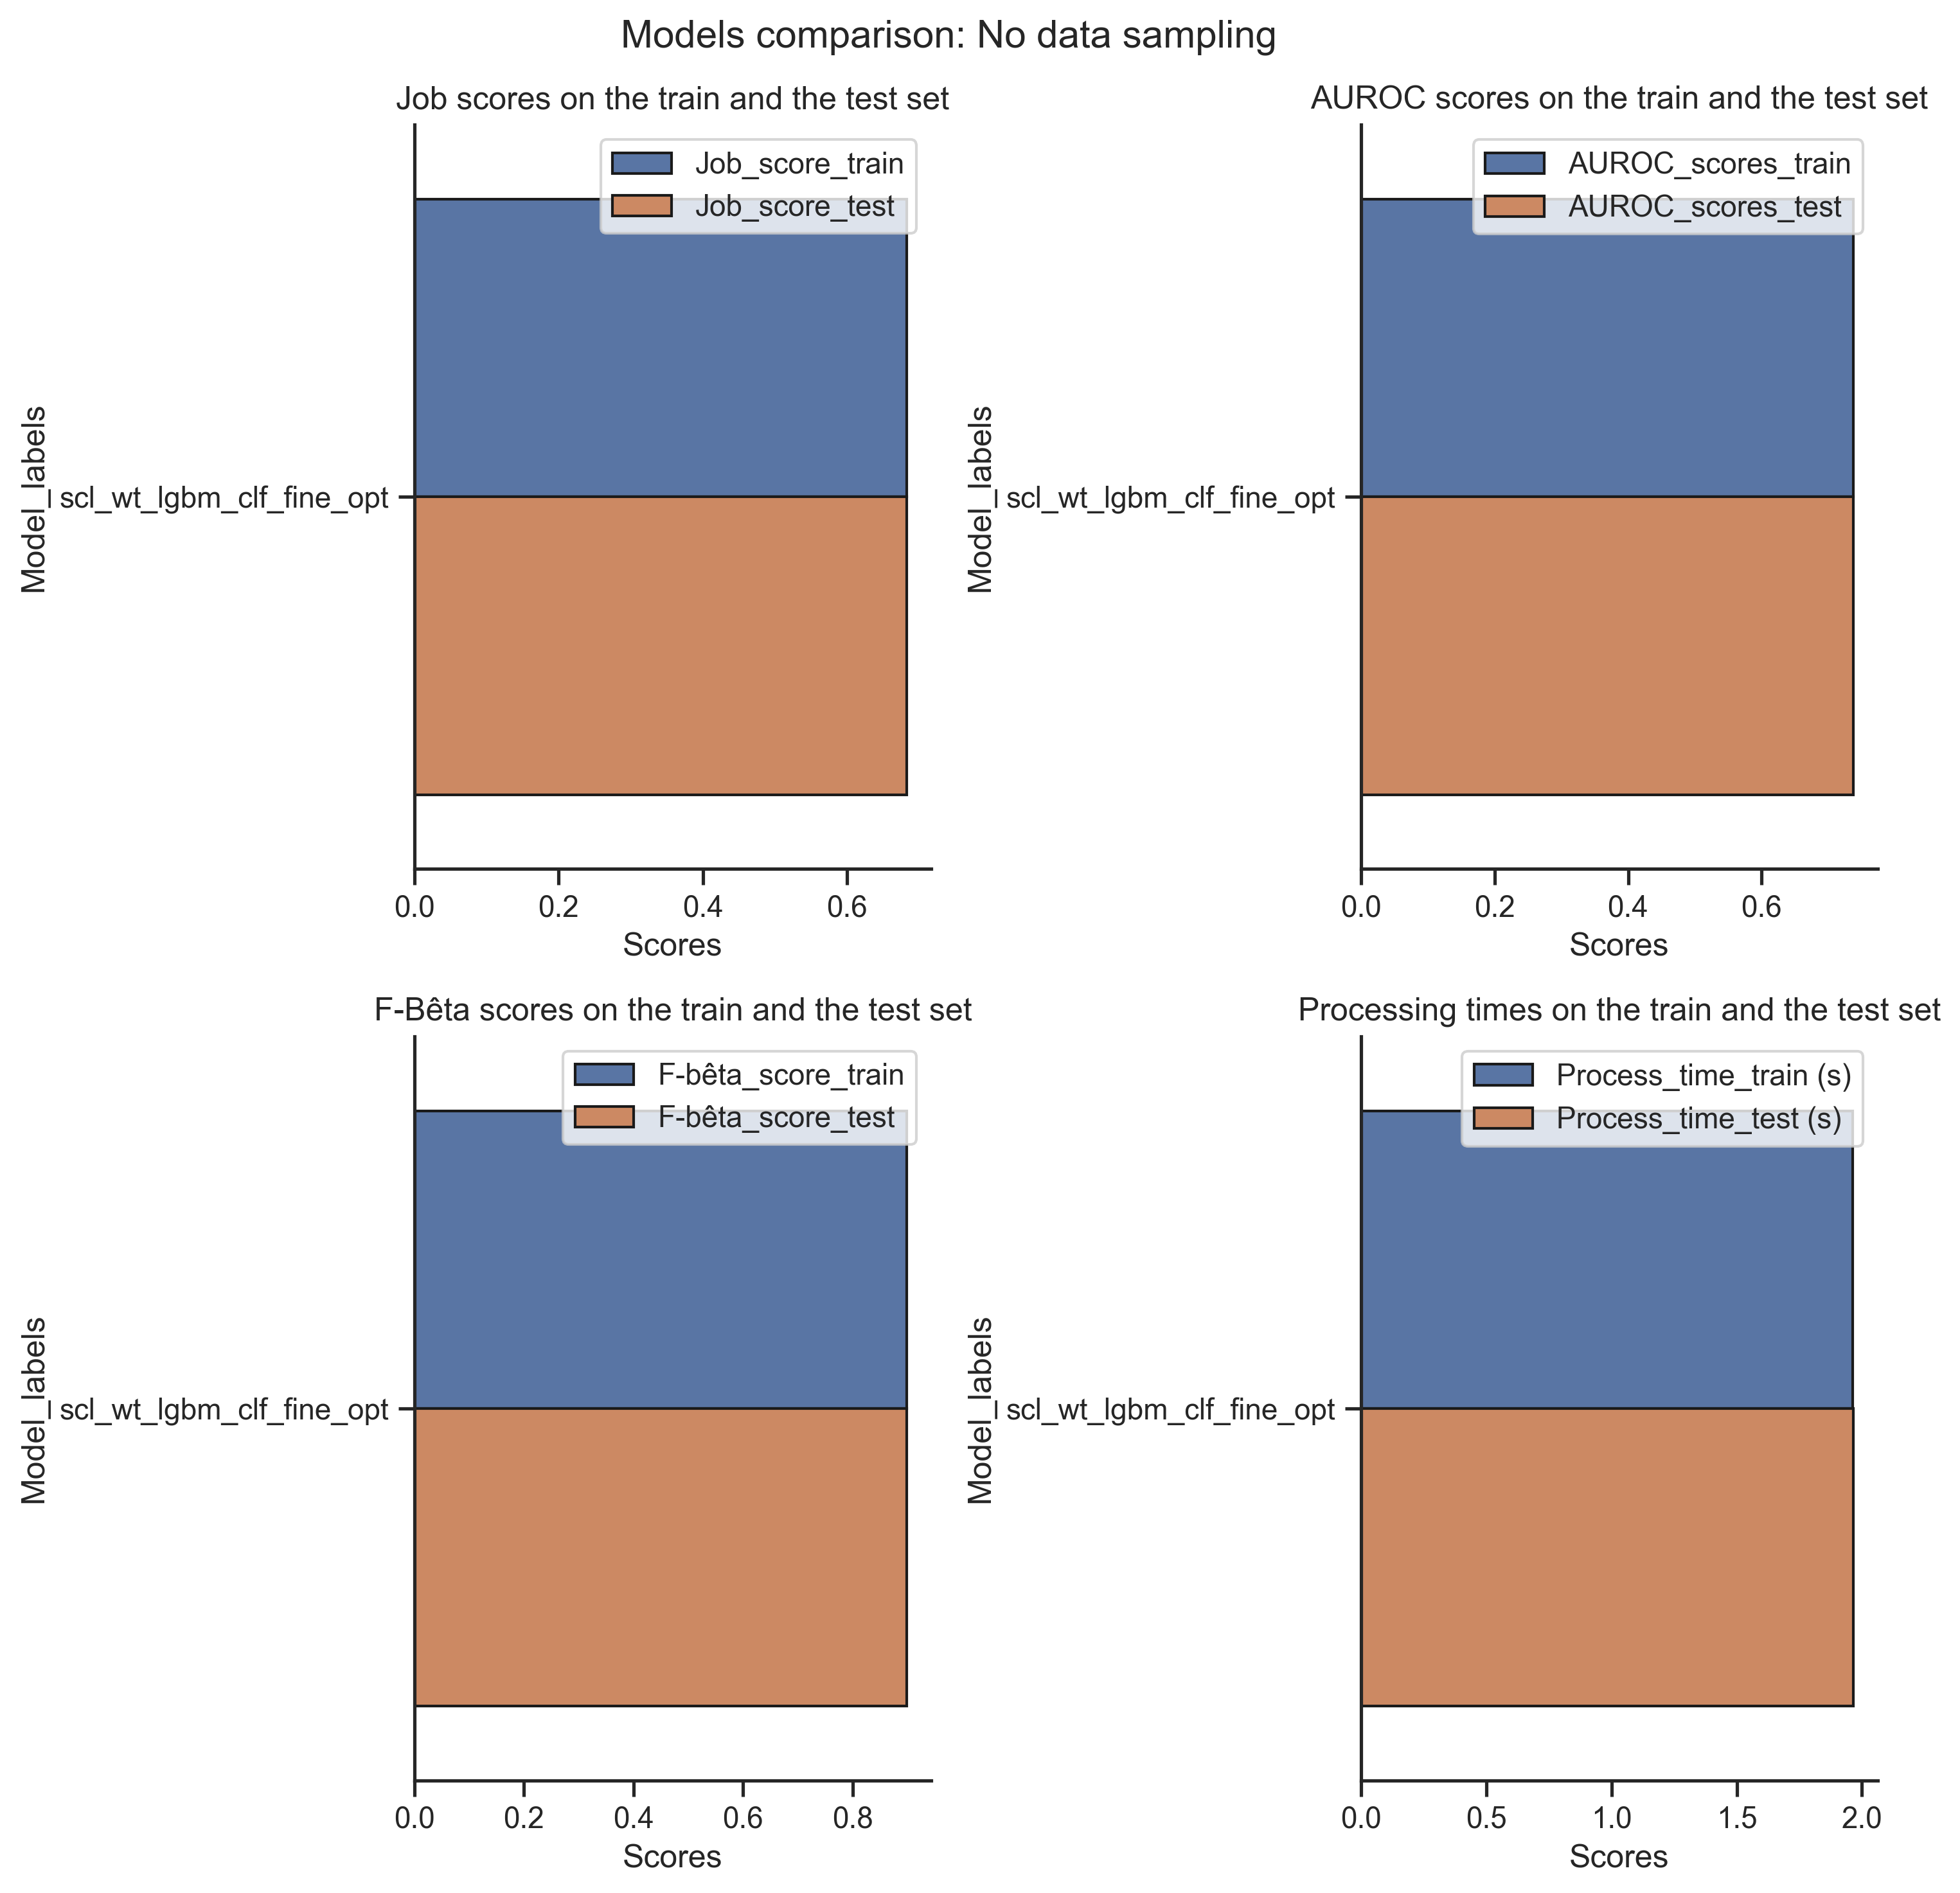

CPU times: total: 719 ms
Wall time: 693 ms


In [27]:
%%time

### Configuration ###

# Select the columns to compare.
l_features_peers = [
                    ['Job_score_train', 'Job_score_test'],
                    ['AUROC_scores_train', 'AUROC_scores_test'],
                    ['F-bêta_score_train', 'F-bêta_score_test'],
                    ['Process_time_train (s)', 'Process_time_test (s)']
                   ]

# Set each subplot titles.
l_subplot_titles = ["Job scores on the train and the test set",
                    "AUROC scores on the train and the test set",
                    "F-Bêta scores on the train and the test set",
                    "Processing times on the train and the test set"]

# Set the figure environment.
fig = plt.figure(figsize=(10,10), dpi=300)

# Set the whole figure title.
fig.suptitle("Models comparison: No data sampling")

# Initialize the subplot grid (2 lines x 2 columns).
l, c = int(len(l_features_peers) / 2), 2


### Plotting ###

# Run the loop to drw and position each subplot on the figure's subplot grid.
i = 0
for i in range(len(l_features_peers)):

    # Get the columns and the subplot title to plot.
    features_peer = l_features_peers[i]
    subplot_title = l_subplot_titles[i]
    
    # Set the position of the subplot.
    p = i + 1
    plt.subplot(l, c, p)
    
    # Plot the subplot.
    figure_barplot(df_MODELS[features_peer],
                   x_labels = 'Model_labels', y_label = 'Scores',
                   title = subplot_title)
    

### Drawing ###

# Arrange the subplots such as they are not superimposing each others. 
plt.tight_layout()

# Draw the figure.
plt.show()

In [35]:
def load_model_data ():

    # Load the optimized and trained model.
    MODEL_PL = pickle.load(open(os.path.join(SELECTED_MODEL_DIR_PATH, PKL_MODEL_FILE), "rb"))

    # Load the relevant datasets.
    df_TRAIN = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
    df_TEST = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_new_customers.csv'))

    # Set the customer IDs column's values as the dataframe indeces.
    X_TRAIN = df_TRAIN.set_index('SK_ID_CURR')
    X_TEST = df_TEST.set_index('SK_ID_CURR')
	
    return MODEL_PL, df_TRAIN, df_TEST


MODEL_PL, df_TRAIN, df_TEST = load_model_data()
display(MODEL_PL, df_TRAIN, df_TEST)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
                                learning_rate=0.07, max_depth=90,
                                min_child_weight=10, n_estimators=50,
                                objective='binary', random_state=0,
                                reg_alpha=0.01, reg_lambda=0.1,
                                subsample=0.7)]])

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,LAST_LOAN_PAID_OVER_AMOUNT_sum,LAST_LOAN_PAID_OVER_AMOUNT_mean,LAST_LOAN_PAID_OVER_AMOUNT_max,LAST_LOAN_PAID_OVER_AMOUNT_min,LAST_LOAN_PAID_OVER_count,LAST_LOAN_PAID_OVER_mean,PAYMENT_MIN_TO_ANNUITY_RATIO,PAYMENT_MAX_TO_ANNUITY_RATIO,PAYMENT_MEAN_TO_ANNUITY_RATIO,TARGET
0,113355.0,0.0,0.0,1.0,225000.0,315000.0,22918.5,315000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0
1,113729.0,0.0,1.0,0.0,157500.0,451102.5,23161.5,337500.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0
2,109200.0,0.0,1.0,0.0,121500.0,381528.0,21433.5,315000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0
3,127774.0,0.0,1.0,1.0,135000.0,254700.0,27153.0,225000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0
4,120008.0,0.0,0.0,1.0,157500.0,523278.0,26847.0,391500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.076172,2.076172,2.076172,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,112311.0,0.0,1.0,0.0,135000.0,175896.0,7875.0,126000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.014107,2.953125,1.483398,0.0
23995,107102.0,0.0,1.0,0.0,36000.0,910890.0,26761.5,652500.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0
23996,130525.0,0.0,0.0,1.0,135000.0,961146.0,25483.5,688500.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0
23997,111919.0,0.0,0.0,0.0,135000.0,270000.0,14647.5,270000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427,0.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,LAST_LOAN_LATE_PAYMENT_mean,LAST_LOAN_PAID_OVER_AMOUNT_sum,LAST_LOAN_PAID_OVER_AMOUNT_mean,LAST_LOAN_PAID_OVER_AMOUNT_max,LAST_LOAN_PAID_OVER_AMOUNT_min,LAST_LOAN_PAID_OVER_count,LAST_LOAN_PAID_OVER_mean,PAYMENT_MIN_TO_ANNUITY_RATIO,PAYMENT_MAX_TO_ANNUITY_RATIO,PAYMENT_MEAN_TO_ANNUITY_RATIO
0,100001.0,0.0,1.0,0.0,135000.0,568800.0,20560.5,450000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
1,100005.0,0.0,0.0,0.0,99000.0,222768.0,17370.0,180000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
2,100013.0,0.0,0.0,1.0,202500.0,663264.0,69777.0,630000.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
3,100028.0,0.0,1.0,0.0,315000.0,1575000.0,49018.5,1575000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.001743,0.001743,0.001743
4,100038.0,0.0,0.0,1.0,180000.0,625500.0,32067.0,625500.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,318261.0,0.0,1.0,0.0,126000.0,148500.0,15345.0,148500.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
29996,318263.0,0.0,1.0,0.0,135000.0,601470.0,30838.5,450000.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
29997,318264.0,0.0,1.0,0.0,130500.0,260640.0,31059.0,225000.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
29998,318266.0,0.0,1.0,0.0,202500.0,522396.0,38142.0,472500.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304443,0.398682,0.362427
